In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os,sys,inspect,pickle,json,time,datetime,re; root = os.path.dirname(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))))
import random as rn
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
root

TARGET = 'activity'
DATA_DIR = 'activity-atactic'
INPUT_FOLDER = 'v02_add55x5x3roll'#'v11_whole_year_noshift_noroll'#'v10_one_month_noshift'#v10_one_month_noshift 'v09_one_month'#'v02_add55x5x3roll' # 'v01_original_clean'##'v00_original'
EXTRA_DATA1 = 'v00_original\\activity_test_timestamps.csv'

# load
train_data = pickle.load(open(os.path.join(root,'input',DATA_DIR,INPUT_FOLDER,'train.pkl'),"rb"))
test_data  = pickle.load(open(os.path.join(root,'input',DATA_DIR,INPUT_FOLDER,'test.pkl'),"rb"))
extra_data1 = pd.read_csv(os.path.join(root,'input',DATA_DIR,EXTRA_DATA1), index_col="date", parse_dates=["date"])
print('train_data',train_data.shape, 'test_data',test_data.shape, 'extra_data1',extra_data1.shape)#, 'atactic_test_target',atactic_test_target.shape,time.time()-tic,'sec')
ac_tags = pd.read_csv('activity_tags.csv',delimiter=';')
def feat_desc(fname): desc = ac_tags[ac_tags.feature==fname][['description','units']].values[0]; return desc[0] + ', ' + desc[1]
print(train_data.index[0], train_data.index[-1])
feat_desc('f23')


train_data (300737, 881) test_data (85891, 880) extra_data1 (85891, 0)
2018-02-13 14:31:00 2018-12-31 22:07:00


'Расход ТЭА к R2, л/c'

In [41]:
y_test_pseudo.shift(6, freq="H")

,activity
date,
2019-01-01 06:30:00,39.121674
2019-01-01 06:31:00,39.043274
2019-01-01 06:32:00,38.376667
2019-01-01 06:33:00,38.239136
2019-01-01 06:34:00,38.010910
2019-01-01 06:35:00,38.288925
2019-01-01 06:36:00,37.514256
2019-01-01 06:37:00,37.820110
2019-01-01 06:38:00,38.145504


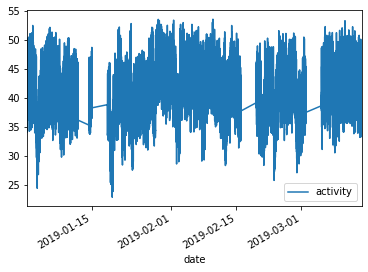

In [20]:
y_test_pseudo = pd.read_csv('fwdroll_year_y2019_11m_15d_00h_50min_12s_975046_xgb_sub.csv', index_col="date", parse_dates=["date"])
y_test_pseudo.plot()

In [3]:
test_data['activity'] = y_test_pseudo['activity'] #.shift(6, freq="H")

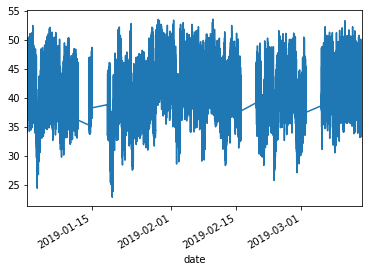

In [4]:
test_data['activity'].plot()

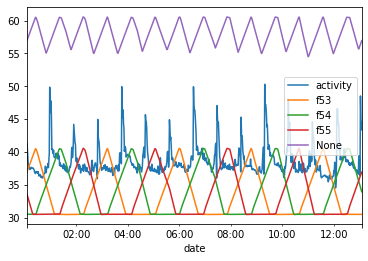

In [5]:
start = '2019-02-11 00:05:00'
end = '2019-02-11 13:05:00'
test_data['activity'][start:end].plot()
(test_data['f53'][start:end]/1000 + 30).plot()#figsize=(10,4))
(test_data['f54'][start:end]/1000 + 30).plot()#figsize=(10,4))
(test_data['f55'][start:end]/1000 + 30).plot()#figsize=(10,4))
(test_data[['f53','f54','f55']].max(axis=1)/1000 + 50)[start:end].plot()

plt.legend()

In [6]:
test_data.shape

(85891, 881)

In [7]:
def normalize_by_train(x_train, x_val, x_test, y_train, y_val, train, TARGET, USE_TEST):
    import numpy as np
    # normalize
    #center, scale = train.iloc[:, 1:].mean().values, train.iloc[:, 1:].std().values
    center_x, scale_x = train.drop(TARGET, axis=1, inplace=False).mean().values, train.drop(TARGET, axis=1, inplace=False).std().values
    center_y, scale_y = train[TARGET].mean(), train[TARGET].std()
    x_train_n = (x_train - center_x)/scale_x
    x_val_n   = (x_val   - center_x)/scale_x
    x_test_n  = (x_test  - center_x)/scale_x if USE_TEST else np.array([])
    y_train_n = (y_train - center_y)/scale_y
    y_val_n   = (y_val   - center_y)/scale_y
    #print('x_train_n',x_train_n.shape, 'y_train_n',y_train_n.shape, 'x_val_n',x_val_n.shape, 'y_val_n', y_val_n.shape)
    return x_train_n, x_val_n, x_test_n, y_train_n, y_val_n


In [11]:
train = train_data
center_x, scale_x = train.drop(TARGET, axis=1, inplace=False).mean().values, train.drop(TARGET, axis=1, inplace=False).std().values
print(train.shape, center_x.shape, scale_x.shape )

(300737, 881) (880,) (880,)


5

In [18]:
# f4 = 5 column
center_x[train.columns.tolist().index('f4')], scale_x[train.columns.tolist().index('f4')]

(0.001697737021078613, 0.00012743526295296855)

In [36]:
import pandas as pd
import numpy as np
df = pd.DataFrame([['2018-02-13 08:30:00'], ['2018-02-13 09:31:00'], ['2018-02-13 10:32:00'], ['2018-02-13 11:33:00'], ['2018-02-13 12:34:00']], columns=['Date'])
df['Val'] = np.random.randn(len(df))
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.index = df['Date']
df = df.drop(columns=['Date'])
df1=df
df1

,Val
Date,
2018-02-13 08:30:00,2.578057
2018-02-13 09:31:00,1.322240
2018-02-13 10:32:00,0.467845
2018-02-13 11:33:00,1.123305
2018-02-13 12:34:00,-1.608443


In [37]:
df1_s = df1.shift(2, freq="H")
df1_s

,Val
Date,
2018-02-13 10:30:00,2.578057
2018-02-13 11:31:00,1.322240
2018-02-13 12:32:00,0.467845
2018-02-13 13:33:00,1.123305
2018-02-13 14:34:00,-1.608443


In [48]:
#res = df1_s[ df1.index == df1_s.index]
#df1.index == df1_s.index
df1.join(df1_s, on='Date',lsuffix='_caller', rsuffix='_other',how = 'outer')#{‘left’, ‘right’, ‘outer’, ‘inner’})

,Val_caller,Val_other
Date,,
2018-02-13 08:30:00,2.578057,NaN
2018-02-13 09:31:00,1.322240,NaN
2018-02-13 10:32:00,0.467845,NaN
2018-02-13 11:33:00,1.123305,NaN
2018-02-13 12:34:00,-1.608443,NaN
2018-02-13 10:30:00,NaN,2.578057
2018-02-13 11:31:00,NaN,1.322240
2018-02-13 12:32:00,NaN,0.467845
2018-02-13 13:33:00,NaN,1.123305


In [26]:
df = pd.DataFrame([['2018-02-13 08:30:00'], ['2018-02-13 09:31:00'], ['2018-02-13 10:32:00'], ['2018-02-13 11:33:00'], ['2018-02-13 12:34:00']], columns=['Date'])
df['Val'] = np.random.randn(len(df))
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.index = df['Date']
df = df.drop(columns=['Date'])
df2=df
df2

,Val
Date,
2018-02-13 08:30:00,1.343433
2018-02-13 09:31:00,1.733114
2018-02-13 10:32:00,0.396023
2018-02-13 11:33:00,0.712307
2018-02-13 12:34:00,0.675816


In [27]:
df3 = df1_s[ df2.index >= df1_s.index[0]]

df3.index 

DatetimeIndex(['2018-02-13 12:32:00', '2018-02-13 13:33:00',
               '2018-02-13 14:34:00'],
              dtype='datetime64[ns]', name='Date', freq='61T')

In [50]:
import itertools

list_of_lists = [['a','b'],['c','d']]
list(itertools.product(*list_of_lists))

[('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd')]